In [159]:
import scanpy as sc
from scipy.sparse import csr_matrix
sc.set_figure_params(dpi=80)
import csv
from numpy import savetxt
import numpy as np
from anndata import AnnData
from typing import Union, Optional, Tuple, Collection, Sequence, Iterable
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
import pandas as pd

# Load Data

In [23]:
FLE = sc.read_h5ad('FLE_scaled_v2.h5ad')
FLE

AnnData object with n_obs × n_vars = 30000 × 18260 
    obs: 'Age', 'Module 1 Score', 'Module 2 Score', 'Module 3 Score', 'Module 4 Score', 'Module 5 Score', 'Module 6 Score'
    uns: 'Age_colors'
    obsm: 'FLE', 'X_umap'

In [24]:
print(FLE.X.sum(axis=1).A1, "has been processed")

[3776.6277 3006.726  3796.592  ... 3721.4287 3751.5244 3607.6619] has been processed


In [5]:
def module_score(
    adata:AnnData,
    genes_use: list,
    score_name: Optional[str] = None,
    verbose: bool = True):
    
    """\
    Compute module scores for all cells in adata as described in methods of RGC-dev paper.
    
    
    Parameters
    ----------
    adata
        The (annotated) data matrix of shape `n_obs` × `n_vars`.
        Rows correspond to cells and columns to genes.
    genes_use
        list of genes in module of interest
    score_name
        Name endowed to the module score to be computed
        e.g. "Mod1"
    verbose
        Inform user of fraction of module genes that are in adata
        
    Returns
    -------
    adata with a new .obs called score_name
    
    """
    
    if (score_name==None):
        score_name = str(input("Provide a name for this score (no spaces): "))
        
    genes_use0 = genes_use
    genes_use = list(set(genes_use).intersection(adata.var_names))#genes that are both in module and `adata`
    
     
    if (len(genes_use) == 0):
        raise ValueError("Error : Must provide a list of genes that are present in the data")
        
    
    if (verbose):
        if(len(genes_use0) > len(genes_use)):
            n = len(genes_use0) - len(genes_use)
            print("Note that", n, "of the", len(genes_use0), "genes in your module do not exist in the data set." )
    
    
    
    adata_score = adata.copy()
    adata_score = adata[:,genes_use]
    
    counts_modgenes = adata_score.X.toarray() #all cells, module genes
    counts_all = adata.X.toarray() #all cells, all genes
    scores = np.mean(counts_modgenes, axis=1) - np.mean(counts_all, axis=1) #(row means of counts_modgenes ) - (row means of counts_all)
    
    adata.obs[score_name] = scores

# Compute wave scores

In [25]:
with open('../waves/wave1.txt', 'r') as f:
    wave1 = [line.strip() for line in f]
print(len(wave1))

with open('../waves/wave2.txt', 'r') as f:
    wave2 = [line.strip() for line in f]
print(len(wave2))

with open('../waves/wave3.txt', 'r') as f:
    wave3 = [line.strip() for line in f]
print(len(wave3))

with open('../waves/wave4.txt', 'r') as f:
    wave4 = [line.strip() for line in f]
print(len(wave4))

with open('../waves/wave5.txt', 'r') as f:
    wave5 = [line.strip() for line in f]
print(len(wave5))

with open('../waves/wave6.txt', 'r') as f:
    wave6 = [line.strip() for line in f]
print(len(wave6))

65
61
50
99
69
39


In [13]:
module_score(FLE, wave1, "Wave 1 Score")
module_score(FLE, wave2, "Wave 2 Score")
module_score(FLE, wave3, "Wave 3 Score")
module_score(FLE, wave4, "Wave 4 Score")
module_score(FLE, wave5, "Wave 5 Score")
module_score(FLE, wave6, "Wave 6 Score")




Note that 3 of the 65 genes in your module do not exist in the data set.
Note that 1 of the 61 genes in your module do not exist in the data set.
Note that 1 of the 50 genes in your module do not exist in the data set.
Note that 1 of the 99 genes in your module do not exist in the data set.
Note that 1 of the 39 genes in your module do not exist in the data set.


In [27]:
sc.set_figure_params(dpi=80, dpi_save=1000)

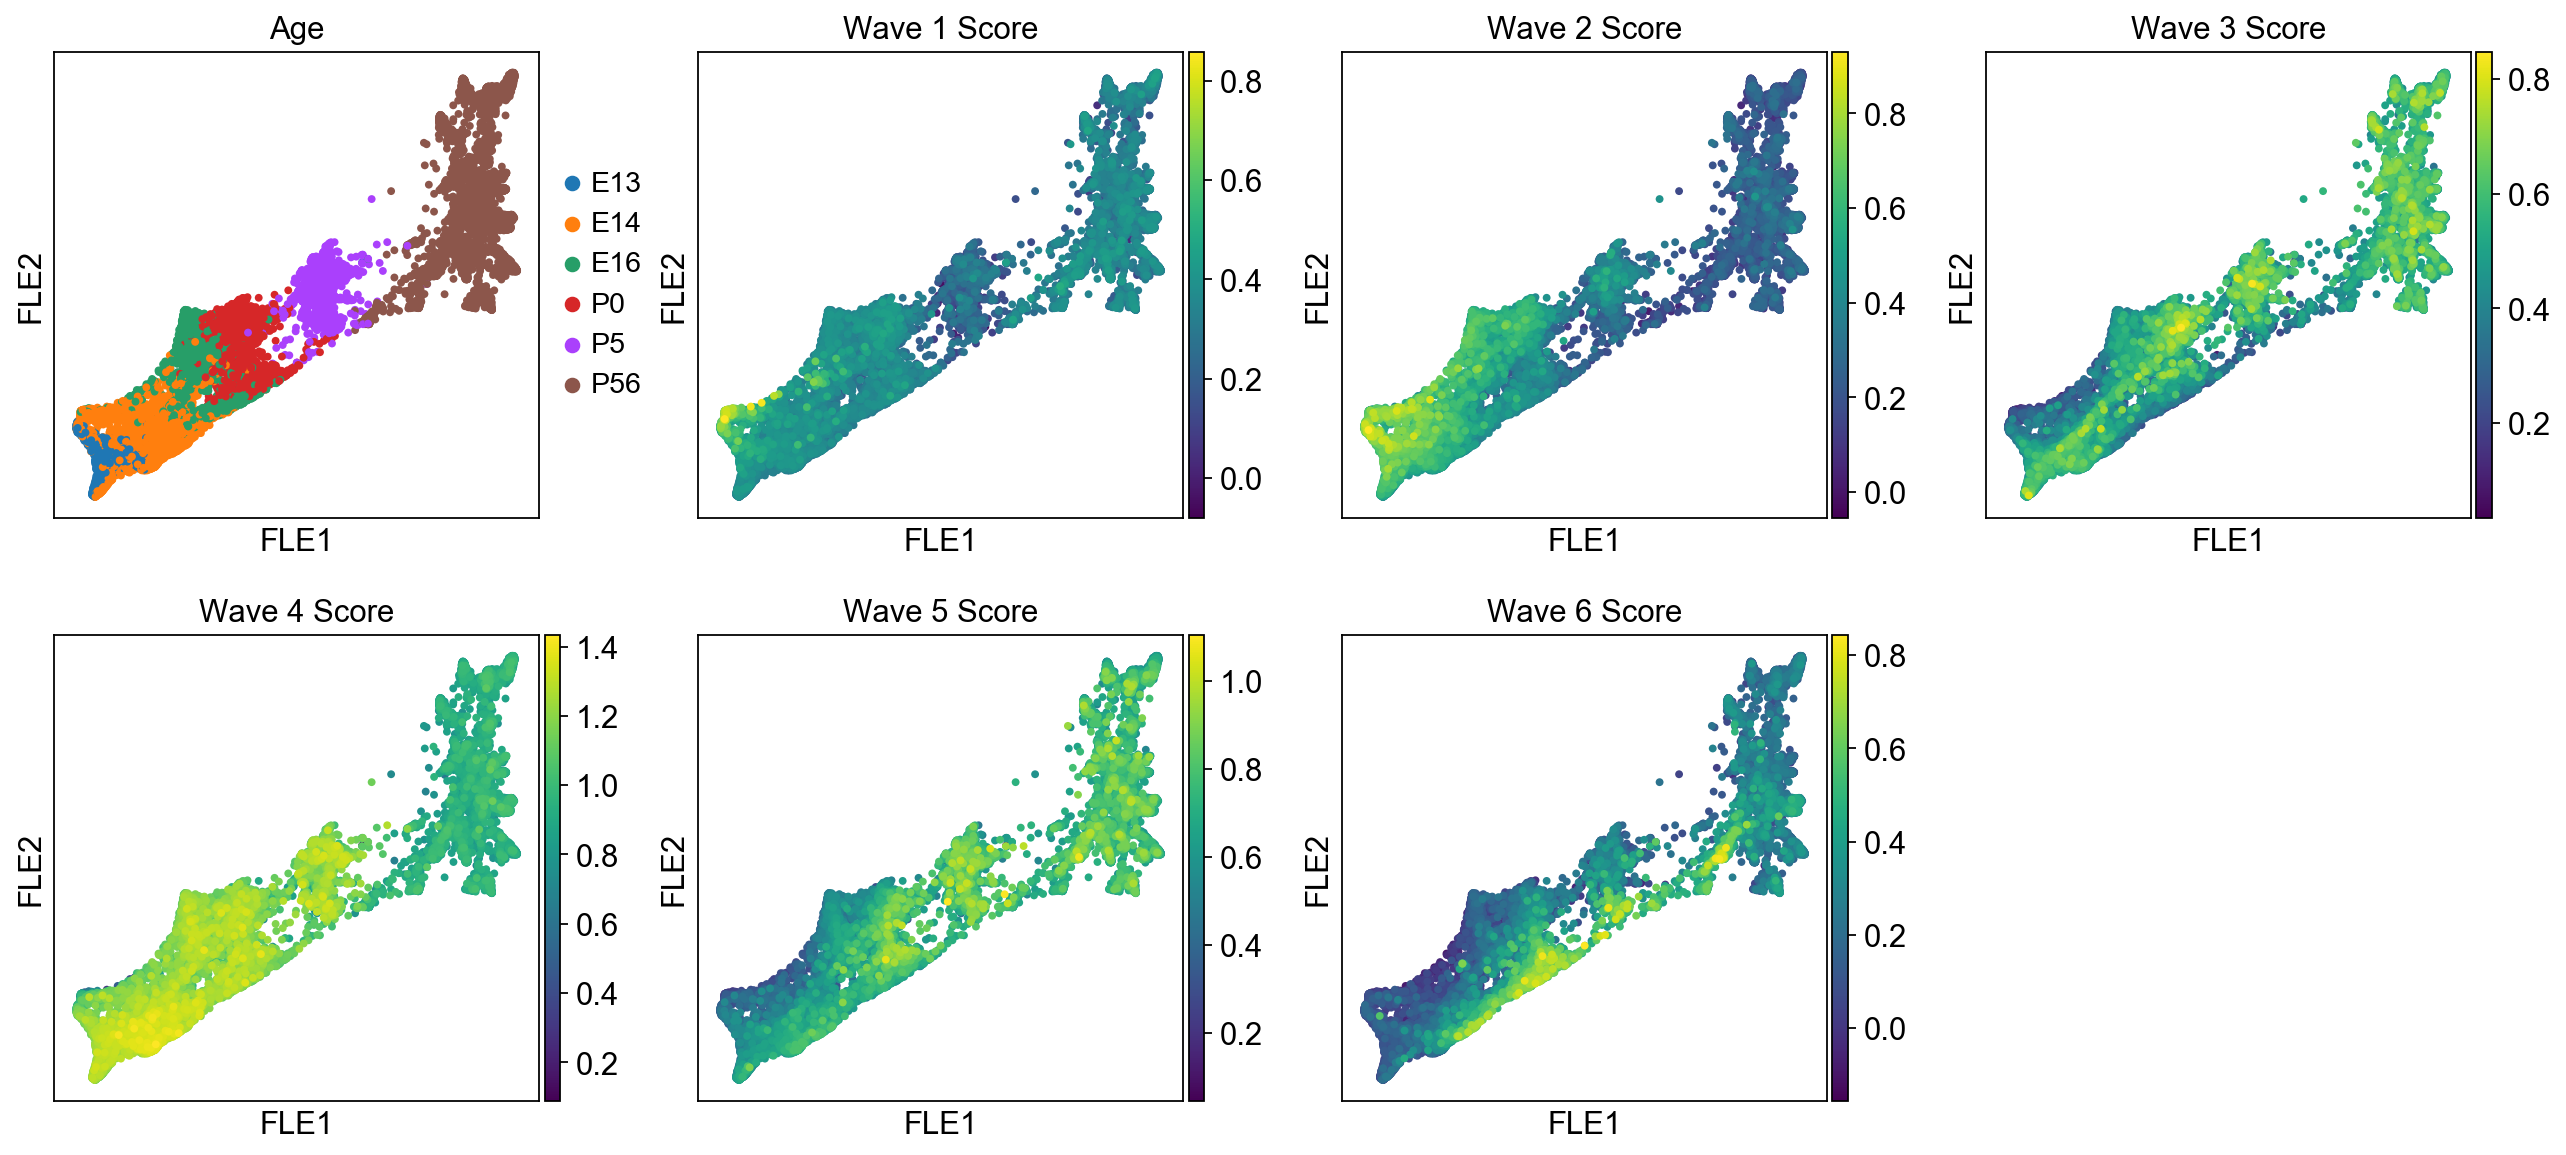

In [28]:
sc.pl.embedding(FLE,basis='FLE',color=['Age','Wave 1 Score','Wave 2 Score','Wave 3 Score','Wave 4 Score', 'Wave 5 Score', 'Wave 6 Score'], size=50, save='Waves.pdf')

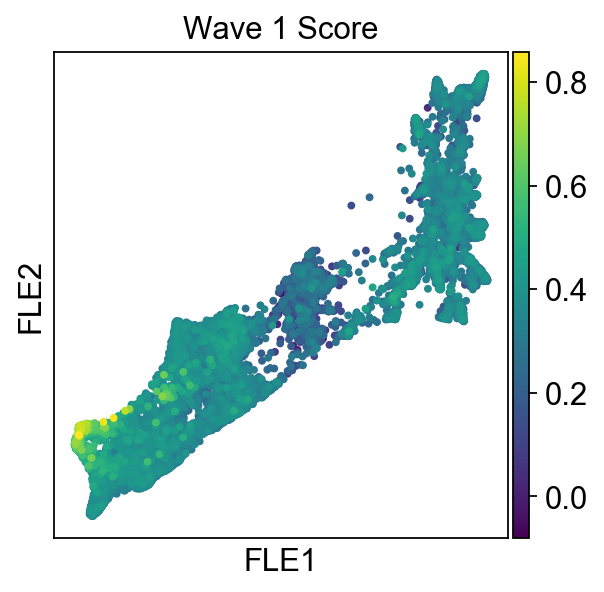

In [29]:
sc.pl.embedding(FLE,basis='FLE',color=['Wave 1 Score'], size=50, save='Wave1.pdf')

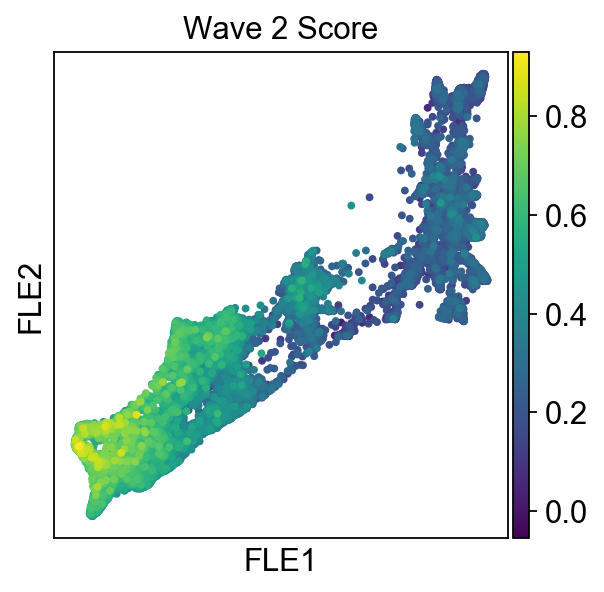

In [30]:
sc.pl.embedding(FLE,basis='FLE',color=['Wave 2 Score'], size=50, save='Wave2.pdf')

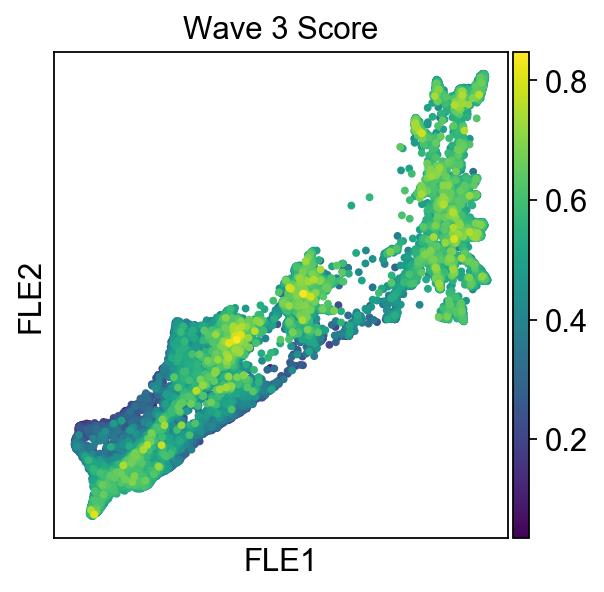

In [31]:
sc.pl.embedding(FLE,basis='FLE',color=['Wave 3 Score'], size=50, save='Wave3.pdf')

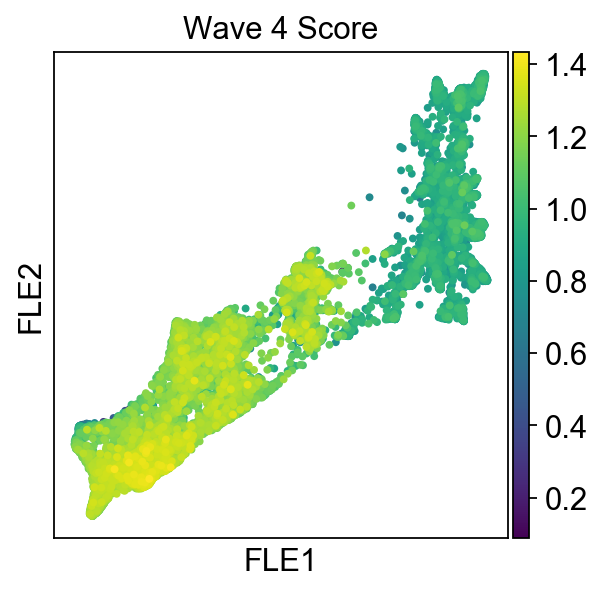

In [32]:
sc.pl.embedding(FLE,basis='FLE',color=['Wave 4 Score'], size=50, save='Wave4.pdf')

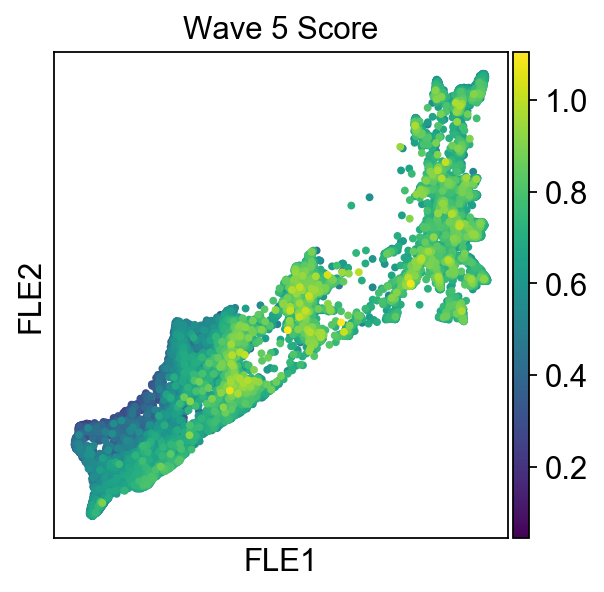

In [33]:
sc.pl.embedding(FLE,basis='FLE',color=['Wave 5 Score'], size=50, save='Wave5.pdf')

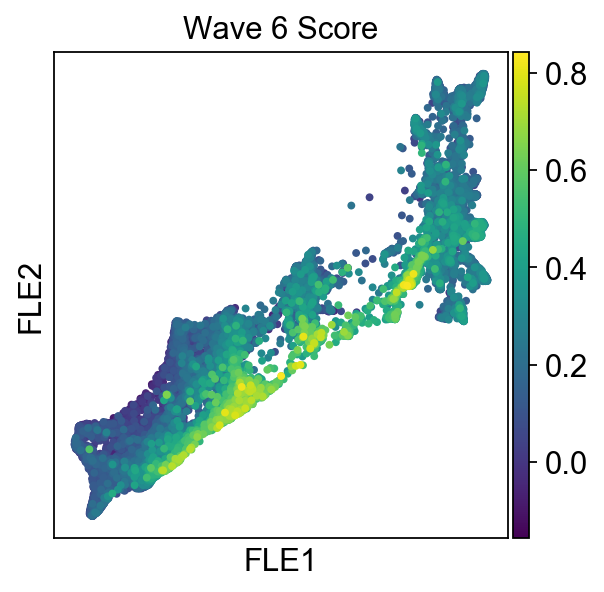

In [34]:
sc.pl.embedding(FLE,basis='FLE',color=['Wave 6 Score'], size=50, save='Wave6.pdf')

# Intersection of module and wave list

Make wave super list.

In [26]:
wave = wave1 + wave2 + wave3 + wave4 + wave5 + wave6
print(len(wave))

383


Read in modules

In [27]:
with open('../modules/mod1.txt', 'r') as f:
    mod1 = [line.strip() for line in f]
with open('../modules/mod2.txt', 'r') as f:
    mod2 = [line.strip() for line in f]
with open('../modules/mod3.txt', 'r') as f:
    mod3 = [line.strip() for line in f]
with open('../modules/mod4.txt', 'r') as f:
    mod4 = [line.strip() for line in f]
with open('../modules/mod5.txt', 'r') as f:
    mod5 = [line.strip() for line in f]
with open('../modules/mod6.txt', 'r') as f:
    mod6 = [line.strip() for line in f]

module = mod1+mod2+mod3+mod4+mod5+mod6
print(len(module))

1607


In [28]:
print(len(mod1))
print(len(mod2))
print(len(mod3))
print(len(mod4))
print(len(mod5))
print(len(mod6))

185
192
152
198
236
644


In [30]:
common = list(set(wave).intersection(module))
print(len(common))

183


Which modules are these 183 in?

In [32]:
commongeneindexinmodule = np.zeros((len(common)))
for i in range(0,len(common)):
    commongeneindexinmodule[i] = (module.index(common[i]))

print(commongeneindexinmodule.shape)

(183,)


In [40]:
def mod_count(lower,upper):
    count = []
    for i in range(0,commongeneindexinmodule.shape[0]):
        if(commongeneindexinmodule[i]>=lower and commongeneindexinmodule[i]<=upper):
            count.append(commongeneindexinmodule[i])
            
    #return len(count)
    return count

In [41]:
print(mod_count(0,185))
print(mod_count(186,377))
print(mod_count(378,529))
print(mod_count(530,727))
print(mod_count(728,963))
print(mod_count(964,1607))

[86.0, 21.0, 3.0, 6.0, 106.0, 124.0, 180.0, 148.0, 161.0, 174.0, 91.0, 87.0, 141.0, 40.0, 121.0, 154.0, 83.0, 14.0, 92.0, 68.0, 52.0, 5.0, 93.0, 157.0, 177.0, 50.0, 122.0, 26.0, 137.0, 10.0, 130.0, 109.0, 128.0, 0.0, 49.0]
[325.0, 335.0, 249.0, 218.0, 311.0, 301.0, 347.0, 214.0, 257.0, 350.0, 281.0, 241.0, 270.0, 368.0, 377.0, 359.0, 256.0, 361.0, 317.0, 326.0, 287.0, 212.0, 268.0, 186.0, 375.0, 240.0, 321.0, 209.0, 338.0, 196.0, 222.0, 341.0, 275.0, 333.0, 276.0, 267.0, 352.0, 205.0, 211.0]
[443.0, 439.0, 425.0, 486.0, 472.0, 464.0, 415.0, 500.0, 392.0, 414.0, 427.0, 490.0, 482.0, 426.0, 397.0]
[567.0, 690.0, 710.0, 638.0, 682.0, 578.0, 616.0, 669.0, 692.0, 607.0, 635.0, 634.0, 593.0, 650.0, 641.0, 609.0, 615.0, 590.0, 683.0, 688.0, 672.0, 644.0, 544.0]
[846.0, 932.0, 905.0, 861.0, 937.0, 774.0, 959.0, 838.0, 800.0, 803.0, 885.0, 746.0, 739.0, 816.0, 742.0, 900.0, 944.0, 733.0, 764.0, 735.0, 762.0, 827.0, 933.0, 745.0, 890.0]
[1359.0, 1438.0, 1222.0, 1550.0, 1079.0, 1418.0, 1398.0, 14

In [42]:
35+39+15+23+25+46

183

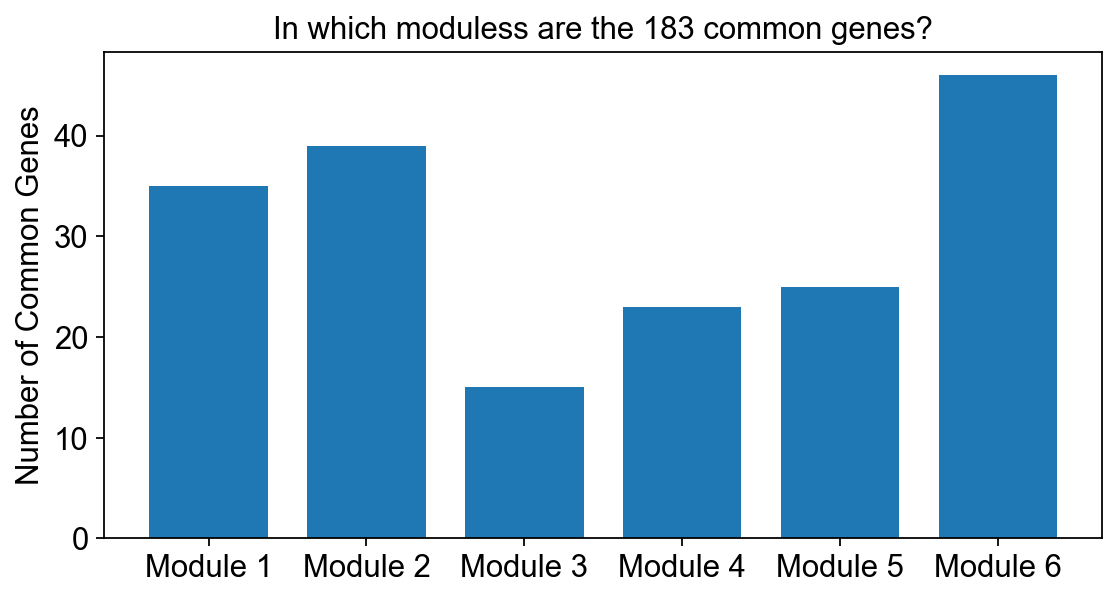

In [44]:
labels = ['Module 1', 'Module 2','Module 3','Module 4','Module 5','Module 6']
counts = [35,39,15,23,25,46]
x = np.arange(len(labels)) 
width = 0.75
plt.bar(x, counts, width)
plt.rcParams["figure.figsize"] = (8,4)
plt.xticks(x,labels)
plt.title('In which moduless are the 183 common genes?')
plt.ylabel('Number of Common Genes')
plt.grid(None)

Which waves are these 183 in?

In [45]:
commongeneindexinwave = np.zeros((len(common)))
for i in range(0,len(common)):
    commongeneindexinwave[i] = (wave.index(common[i]))

print(commongeneindexinwave.shape)

(183,)


In [46]:
def wave_count(lower,upper):
    count = []
    for i in range(0,commongeneindexinwave.shape[0]):
        if(commongeneindexinwave[i]>=lower and commongeneindexinwave[i]<=upper):
            count.append(commongeneindexinwave[i])
            
    #return len(count)
    return count

In [47]:
print(len(wave_count(0,65)))
print(len(wave_count(66,126)))
print(len(wave_count(127,176)))
print(len(wave_count(177,275)))
print(len(wave_count(276,344)))
print(len(wave_count(345,383)))
#print("total is", wave_count(0,65) + wave_count(66,126)+wave_count(127,176)+wave_count(177,275)+wave_count(276,344)+wave_count(345,384))

19
34
29
42
33
26


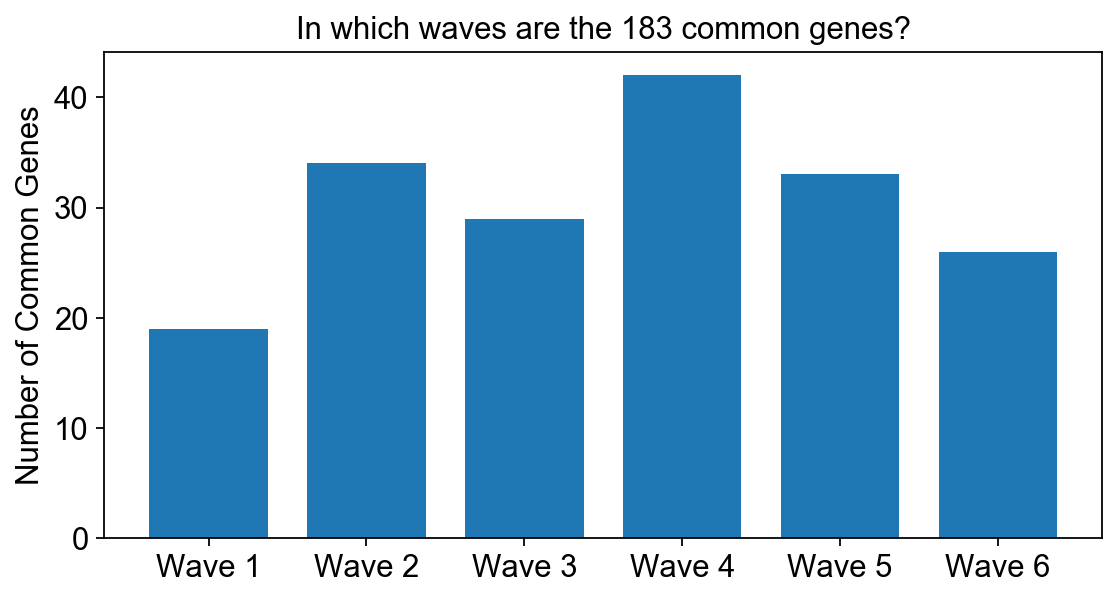

In [48]:
labels = ['Wave 1', 'Wave 2','Wave 3','Wave 4','Wave 5','Wave 6']
counts = [19, 34, 29, 42, 33,26]
x = np.arange(len(labels)) 
width = 0.75
plt.bar(x, counts, width)
plt.rcParams["figure.figsize"] = (8,4)
plt.xticks(x,labels)
plt.title('In which waves are the 183 common genes?')
plt.ylabel('Number of Common Genes')
plt.grid(None)

## More detailed overlap analysis

The 35 common genes in Mod1: which waves are they in? And so on for other mods.

In [51]:
M1 = mod_count(0,185) #contains 35 indices (index in the 1607 module list) of genes that are in the 183 intersection and in Module 1.
M2 = mod_count(186,377)
M3 = mod_count(378,529)
M4 = mod_count(530,727)
M5 = mod_count(728,963)
M6 = mod_count(964,1607)

We want to know which waves are these genes in. A hypothesis would be that they localize in earlier waves because they emanate from an early module. 

For each gene in M1, find which wave it's in. 

In [52]:
print(module[int(M1[0])])
print(module[109])

Pou6f2
Sulf2


Make a list containing the 35 M1 common genes.

In [53]:
def M_commongenes(M):
    Mgenes = []
    for i in range(0,len(M)):
        Mgenes.append(module[int(M[i])])
    return Mgenes

In [54]:
M1genes = M_commongenes(M1)
M2genes = M_commongenes(M2)
M3genes = M_commongenes(M3)
M4genes = M_commongenes(M4)
M5genes = M_commongenes(M5)
M6genes = M_commongenes(M6)

In [55]:
print(len(M1genes)+len(M2genes)+len(M3genes)+len(M4genes)+len(M5genes)+len(M6genes))

183


Which wave is each of M1's genes in?

In [56]:
def W_commongenes(W):
    Wgenes = []
    for i in range(0,len(W)):
        Wgenes.append(wave[int(W[i])])
    return Wgenes

In [57]:
W1 = wave_count(0,65)
W2 = wave_count(66,126)
W3 = wave_count(127,176)
W4 = wave_count(177,275)
W5 = wave_count(276,344)
W6 = wave_count(345,383)

W1genes = W_commongenes(W1)
W2genes = W_commongenes(W2)
W3genes = W_commongenes(W3)
W4genes = W_commongenes(W4)
W5genes = W_commongenes(W5)
W6genes = W_commongenes(W6)

In [58]:
print(len(W1genes)+len(W2genes)+len(W3genes)+len(W4genes)+len(W5genes)+len(W6genes))

183


In [108]:
def M_in_waves(Mgenes,W1genes,W2genes,W3genes,W4genes,W5genes,W6genes):
    dist = []
    dist.append(len(list(set(Mgenes).intersection(W1genes))))
    dist.append(len(list(set(Mgenes).intersection(W2genes))))
    dist.append(len(list(set(Mgenes).intersection(W3genes))))
    dist.append(len(list(set(Mgenes).intersection(W4genes))))
    dist.append(len(list(set(Mgenes).intersection(W5genes))))
    dist.append(len(list(set(Mgenes).intersection(W6genes))))
    return dist

In [163]:
M1dist = M_in_waves(M1genes,W1genes,W2genes,W3genes,W4genes,W5genes,W6genes)
M2dist = M_in_waves(M2genes,W1genes,W2genes,W3genes,W4genes,W5genes,W6genes)
M3dist = M_in_waves(M3genes,W1genes,W2genes,W3genes,W4genes,W5genes,W6genes)
M4dist = M_in_waves(M4genes,W1genes,W2genes,W3genes,W4genes,W5genes,W6genes)
M5dist = M_in_waves(M5genes,W1genes,W2genes,W3genes,W4genes,W5genes,W6genes)
M6dist = M_in_waves(M6genes,W1genes,W2genes,W3genes,W4genes,W5genes,W6genes)

In [164]:
print(M1dist)
print(M2dist)
print(M3dist)
print(M4dist)
print(M5dist)
print(M6dist)

[4, 9, 8, 12, 1, 1]
[3, 14, 3, 9, 5, 5]
[3, 3, 4, 1, 2, 2]
[2, 4, 2, 5, 7, 3]
[3, 2, 6, 5, 6, 3]
[4, 2, 6, 10, 12, 12]


Visualization performed in GraphPad Prism.

In [66]:
def W_in_mods(Wgenes,M1genes,M2genes,M3genes,M4genes,M5genes,M6genes):
    dist = []
    dist.append(len(list(set(Wgenes).intersection(M1genes))))
    dist.append(len(list(set(Wgenes).intersection(M2genes))))
    dist.append(len(list(set(Wgenes).intersection(M3genes))))
    dist.append(len(list(set(Wgenes).intersection(M4genes))))
    dist.append(len(list(set(Wgenes).intersection(M5genes))))
    dist.append(len(list(set(Wgenes).intersection(M6genes))))
    return dist

W1dist = W_in_mods(W1genes,M1genes,M2genes,M3genes,M4genes,M5genes,M6genes)
W2dist = W_in_mods(W2genes,M1genes,M2genes,M3genes,M4genes,M5genes,M6genes)
W3dist = W_in_mods(W3genes,M1genes,M2genes,M3genes,M4genes,M5genes,M6genes)
W4dist = W_in_mods(W4genes,M1genes,M2genes,M3genes,M4genes,M5genes,M6genes)
W5dist = W_in_mods(W5genes,M1genes,M2genes,M3genes,M4genes,M5genes,M6genes)
W6dist = W_in_mods(W6genes,M1genes,M2genes,M3genes,M4genes,M5genes,M6genes)

print(W1dist)
print(W2dist)
print(W3dist)
print(W4dist)
print(W5dist)
print(W6dist)

[4, 3, 3, 2, 3, 4]
[9, 14, 3, 4, 2, 2]
[8, 3, 4, 2, 6, 6]
[12, 9, 1, 5, 5, 10]
[1, 5, 2, 7, 6, 12]
[1, 5, 2, 3, 3, 12]


## Hypergeometric Test for Module-Wave Overlap

In [21]:
[x, M, n, N] = [4, 183, 35, 19] #[M1 genes found in the 19 draws, total number of genes, M1 genes in total, number of draws]
pval = hypergeom.sf(4-1, 183, 35, 19)
print(pval)

0.5119210998127812


In [166]:
C = [M1dist, M2dist, M3dist, M4dist, M5dist, M6dist]
pvals = [[],[],[],[],[],[]]
C # is a module by wave matrix

[[4, 9, 8, 12, 1, 1],
 [3, 14, 3, 9, 5, 5],
 [3, 3, 4, 1, 2, 2],
 [2, 4, 2, 5, 7, 3],
 [3, 2, 6, 5, 6, 3],
 [4, 2, 6, 10, 12, 12]]

In [167]:
pvals

[[], [], [], [], [], []]

In [169]:
for i in range(0,6):
    for j in range(0,6):
        pvals[i].append(hypergeom.sf(C[i][j]-1, 183, sum(C[i][:]), C[0][j] + C[1][j] + C[2][j] + C[3][j] + C[4][j] + C[5][j]))
                        
                        
                        


In [172]:
pd.DataFrame(pvals, columns =['W1', 'W2', 'W3', 'W4', 'W5', 'W6' ]) 

,W1,W2,W3,W4,W5,W6
0,0.511921,0.166379,0.156920,0.063884,0.999588,0.997493
1,0.818213,0.002844,0.973334,0.567960,0.885856,0.695038
2,0.192571,0.553744,0.196738,0.983310,0.794492,0.661678
3,0.725101,0.656567,0.914055,0.648128,0.090656,0.670368
4,0.498292,0.969815,0.179458,0.729328,0.279382,0.729877
5,0.755407,0.999745,0.795593,0.660024,0.080439,0.009967


Visualization performed in GraphPad Prism. 